# I - Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

# II - Data Cleaning

+ Check missing values -> remove all rows  contain missing values

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'transaction_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516384 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   516384 non-null  object 
 1   stock_code    516384 non-null  object 
 2   description   514945 non-null  object 
 3   quantity      516384 non-null  int64  
 4   invoice_date  516384 non-null  object 
 5   unit_price    516384 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       516384 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.5+ MB


In [5]:
df.isnull().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

+ Check datatype and correcting column datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389168 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   389168 non-null  object 
 1   stock_code    389168 non-null  object 
 2   description   389168 non-null  object 
 3   quantity      389168 non-null  int64  
 4   invoice_date  389168 non-null  object 
 5   unit_price    389168 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       389168 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.7+ MB


In [9]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [10]:
df['cust_id'] = df['cust_id'].astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389168 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   389168 non-null  object        
 1   stock_code    389168 non-null  object        
 2   description   389168 non-null  object        
 3   quantity      389168 non-null  int64         
 4   invoice_date  389168 non-null  datetime64[ns]
 5   unit_price    389168 non-null  float64       
 6   cust_id       389168 non-null  int64         
 7   country       389168 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 26.7+ MB


In [12]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


+ Negative numbers in quantity column and convert them to positive numbers

In [13]:
df[df['quantity'] < 0].sample(10)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
79477,C542991,85019C,CURIOUS IMAGES NOTEBOOK SET,-12,2011-02-02 11:54:00,4.25,14460,United Kingdom
185338,C552805,22896,PEG BAG APPLES DESIGN,-6,2011-05-11 12:34:00,2.55,14149,United Kingdom
256309,C559486,23028,DRAWER KNOB CRACKLE GLAZE BLUE,-1,2011-07-08 13:51:00,1.65,13047,United Kingdom
400733,C571346,23111,PARISIENNE SEWING BOX,-1,2011-10-17 11:46:00,12.50,16101,United Kingdom
18198,C537805,85047,WHITE BEADED GARLAND STRING 20LIGHT,-1,2010-12-08 13:18:00,5.55,15311,United Kingdom
382920,C569981,22314,OFFICE MUG WARMER CHOC+BLUE,-2,2011-10-06 19:36:00,2.95,12679,France
191066,C553230,20821,GOLDIE LOOKING MIRROR,-6,2011-05-16 11:09:00,4.95,14201,United Kingdom
107375,C545436,22383,LUNCH BAG SUKI DESIGN,-1,2011-03-02 15:52:00,1.65,13093,United Kingdom
24928,C538350,21169,YOU'RE CONFUSING ME METAL SIGN,-2,2010-12-10 15:01:00,1.45,13798,United Kingdom
360538,C568232,23008,DOLLY GIRL BABY GIFT SET,-2,2011-09-26 11:27:00,16.95,14808,United Kingdom


In [14]:
df.loc[df['quantity'] < 0, 'quantity'] = df['quantity']*(-1)

In [15]:
df[df['quantity'] < 0]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country


In [16]:
df.describe()

,quantity,invoice_date,unit_price,cust_id
count,389168.000000,389168,389168.000000,389168.000000
mean,13.067657,2011-07-03 23:25:50.435750400,3.488779,15287.024473
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-01 11:34:00,1.250000,13952.000000
50%,5.000000,2011-07-20 14:06:00,1.950000,15154.000000
75%,12.000000,2011-10-12 12:47:00,3.750000,16788.000000
max,74215.000000,2011-11-30 17:42:00,38970.000000,18287.000000
std,175.622240,NaN,70.796324,1712.959478


+ Add column

In [17]:
df['amount'] = df['quantity'] * df['unit_price']

In [18]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


+ Extracting time infomation from 'invoice_date' column:

In [19]:
df['month'] = df['invoice_date'].dt.month
df['day'] = df['invoice_date'].dt.day
df['hour'] = df['invoice_date'].dt.hour
df['week_days'] = df['invoice_date'].dt.strftime('%a')
df['year_month'] = df['invoice_date'].dt.strftime('%Y-%m')

In [20]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,Wed,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,Wed,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12


# III - Exploratory Data Analysis (EDA)

#### ❓1. How many monthly active user (MAU) each month?

In [21]:
df = df.sort_values('invoice_date', ascending=True)

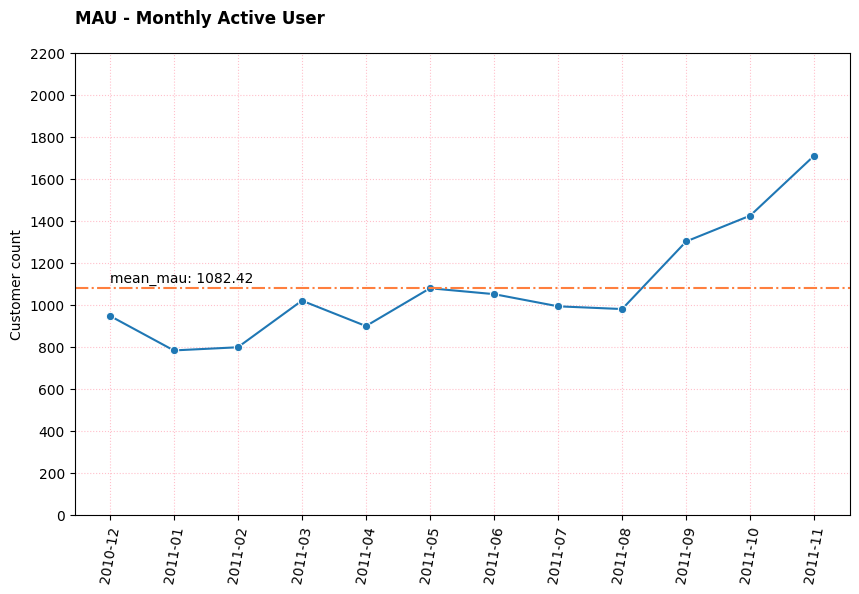

In [23]:
dfplot = df.groupby(
    'year_month'
)['cust_id'].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
    data = dfplot,
    x = 'year_month',
    y = 'cust_id', 
    marker = 'o'
)
plt.grid(True, ls = ':', color='pink')
plt.title('MAU - Monthly Active User\n', loc='left', weight='bold')
plt.yticks(range(0, 2300, 200))
plt.xlabel('')
plt.ylabel('Customer count')
plt.xticks(rotation=80)

mean_mau = dfplot['cust_id'].mean()
plt.axhline(y = mean_mau, ls='-.', color='#FF7F3E')
plt.text(x = 0, y = mean_mau*1.02, s=f'mean_mau: {round(mean_mau, 2)}')
plt.show()

**Key Insight**  
- The **monthly active user (MAU)** stayed below or around **1,000** for most of early 2011, with an overall average of ~**1,082**.  
- A sharp increase appears from **August 2011 onward**, climbing to **1,600+** by October–November.  
- This uptick suggests a significant **marketing push**, **product improvement**, or **seasonal factor** driving user engagement in late 2011.

**Recommended Actions**  
1. **Identify the Growth Trigger**: Investigate promotional campaigns or feature launches that coincide with the jump from August onward. If effective, replicate or extend those strategies.  
2. **Sustain Engagement**: Maintain momentum with ongoing campaigns, improved onboarding, or loyalty programs to keep these newly active users engaged.  
3. **Plan for Off-Peak**: Historically lower months before August might benefit from smaller-scale promotions or “re-engagement” efforts, reducing volatility in monthly activity.  
4. **Deeper Retention Analysis**: Evaluate user cohorts to confirm long-term retention, ensuring the rise in MAU translates into lasting, not merely short-term, user activity.

#### ❓2. How are the number of orders and total order amount each month?

In [24]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,Wed,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,Wed,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12


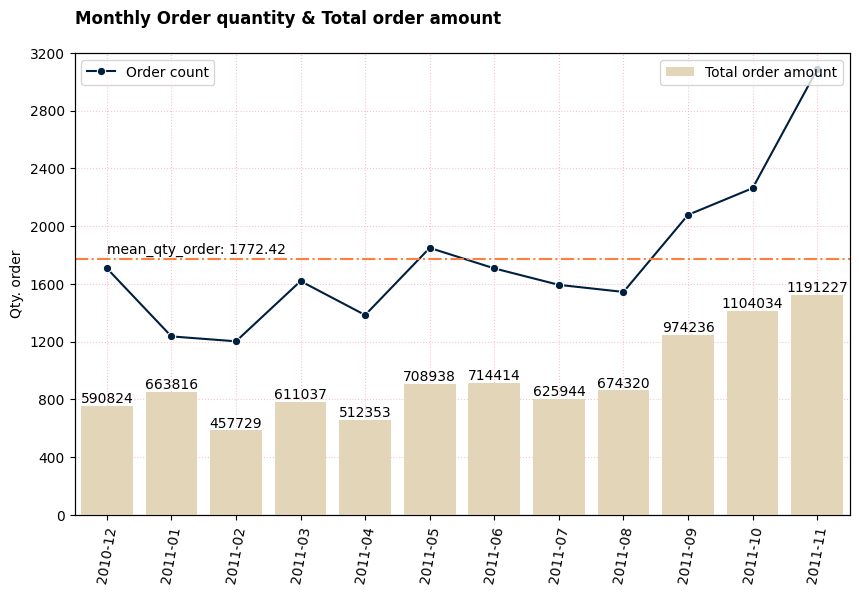

In [25]:
dfplot = df.groupby('year_month').agg(
    order_quatity = ('invoice_num', 'nunique'),
    order_value = ('amount', 'sum')
)
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data = dfplot,
    x = 'year_month',
    y = 'order_quatity', 
    marker = 'o',
    color = '#001F3F',
    label = 'Order count',
)
plt.grid(True, ls = ':', color='pink')
plt.title('Monthly Order quantity & Total order amount\n', loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('Qty. order')
plt.xticks(rotation=80)


mean_qty_order = dfplot['order_quatity'].mean()
plt.axhline(y = mean_qty_order, ls='-.', color='#FF7F3E')
plt.text(x = 0, y = mean_qty_order*1.02, s=f'mean_qty_order: {round(mean_qty_order, 2)}')
plt.yticks(range(0, 3500, 400))
plt.legend(loc=2)

plt.twinx()

ax = sns.barplot(
    data = dfplot,
    x = 'year_month',
    y = 'order_value',
    color = '#EAD8B1',
    label = 'Total order amount'
)
plt.bar_label(ax.containers[0], fmt = '%.0f')
plt.ylim(0, 2_500_000)
plt.yticks([])
plt.ylabel('')
plt.legend(loc=1)

plt.show()

### Key Insights

Order quantity (line) hovered around 1.2–1.7k orders until about July 2011, then sharply rose to 2–3k by late 2011.

Total order amount (bars) likewise climbed from ~600k up to 1.19M in November 2011, accelerating notably from around September onward.

Both metrics’ year-end surge suggests seasonal holiday demand or a successful marketing push in Q4.

### Suggested Actions

Plan Ahead for Peak Season: Increase inventory, staffing, and promotions starting around August 2011 to capitalize on year-end demand.

Investigate Growth Drivers: Review any campaigns or product changes during July–September 2011 for strategies to replicate or scale in future cycles.

Manage Costs: While revenue expands, ensure margins remain healthy by avoiding excessive inventory buildup or overly aggressive discounts.

#### 3. Analyze the number of customers by weekdays and by hour

In [26]:
dfplot1 = pd.pivot_table(
    data = df,
    index = 'week_days',
    columns='hour',
    values='cust_id',
    aggfunc='nunique'
)

dfplot1 = dfplot1.loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']]
dfplot1

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
week_days,,,,,,,,,,,,,,,
Mon,NaN,4.0,78.0,225.0,286.0,315.0,407.0,402.0,338.0,293.0,195.0,103.0,10.0,NaN,NaN
Tue,NaN,5.0,107.0,266.0,355.0,375.0,444.0,402.0,331.0,334.0,185.0,130.0,3.0,NaN,NaN
Wed,NaN,4.0,98.0,286.0,363.0,351.0,467.0,414.0,362.0,353.0,256.0,98.0,NaN,1.0,1.0
Thu,21.0,9.0,90.0,263.0,397.0,347.0,459.0,412.0,400.0,373.0,288.0,266.0,188.0,151.0,22.0
Fri,NaN,8.0,112.0,250.0,350.0,307.0,379.0,347.0,297.0,252.0,127.0,84.0,3.0,1.0,1.0
Sun,NaN,NaN,NaN,5.0,170.0,300.0,350.0,290.0,252.0,259.0,89.0,NaN,NaN,NaN,NaN


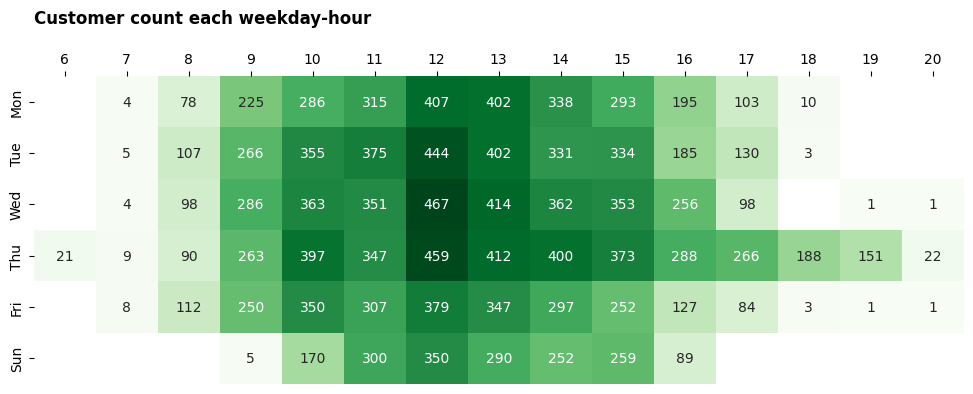

In [28]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    data=dfplot1, 
    annot=True, 
    cbar=False,
    fmt='.0f',
    cmap = 'Greens'
)
plt.xlabel(''), plt.ylabel('')
ax.xaxis.tick_top()
plt.title('Customer count each weekday-hour\n', loc='left', weight='bold')
plt.show()

### Insights

Peak customer traffic occurs around midday (11 AM–1 PM) on weekdays, often reaching 400+.

Early morning (6–8 AM) and late evening (after 6 PM) show minimal activity, typically below 100.

Monday through Thursday share similar patterns, while Friday shows a slight dip, and Sunday appears almost inactive (closed or reduced hours).

### Recommended Actions

Staff Allocation: Increase staffing during 10 AM–1 PM from Monday to Thursday to handle the surge.

Off-Peak Promotions: Consider special discounts for early mornings (6–9 AM) or post–6 PM to boost low-traffic periods.

Peak-Time Efficiency: Streamline service, inventory, and checkout processes during the 10 AM–1 PM rush to minimize congestion.

#### 4. Top 10 Contries bring most sales for the company?

In [29]:
dfplot = df.groupby(
    'country'
)['amount'].sum().reset_index().sort_values('amount', ascending=False).head(10)

dfplot

,country,amount
35,United Kingdom,7202061.844
23,Netherlands,274503.120
10,EIRE,273825.110
14,Germany,227872.430
13,France,213830.250
0,Australia,139965.350
30,Spain,68018.650
32,Switzerland,57148.500
3,Belgium,40055.690
31,Sweden,39684.750


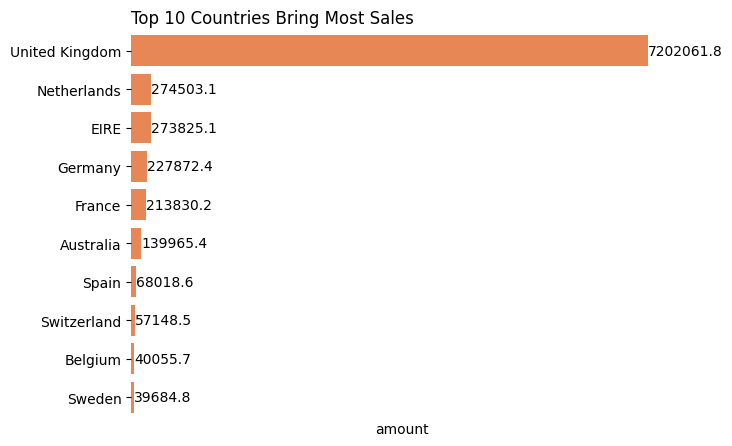

In [30]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data = dfplot,
    y = 'country',
    x = 'amount',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 countries bring most sales'.title(), loc='left')
plt.show()

### Insights

The United Kingdom dominates overall sales at 7.20 million, far surpassing other top countries.
The next biggest contributors (Netherlands, EIRE, Germany, France) range between 200K–300K in sales.
This indicates a primary market focus in the UK, with significant but much smaller activity in a few other European countries.

#### 5. Countries with most AOV - Average Order Value

In [31]:
dfplot = df.groupby(
    'country'
).agg(
    sum_order_amount = ('amount', 'sum'),
    qty_order = ('invoice_num', 'nunique'),
).reset_index()

dfplot['aov'] = dfplot['sum_order_amount'] / dfplot['qty_order']
dfplot = dfplot.sort_values('aov', ascending=False).head(10)

dfplot

,country,sum_order_amount,qty_order,aov
29,Singapore,33438.19,10,3343.819000
23,Netherlands,274503.12,98,2801.052245
0,Australia,139965.35,69,2028.483333
20,Lebanon,1693.88,1,1693.880000
19,Japan,39375.19,27,1458.340370
17,Israel,7449.13,6,1241.521667
4,Brazil,1143.60,1,1143.600000
33,USA,4274.66,4,1068.665000
27,RSA,1002.31,1,1002.310000
9,Denmark,18973.64,20,948.682000


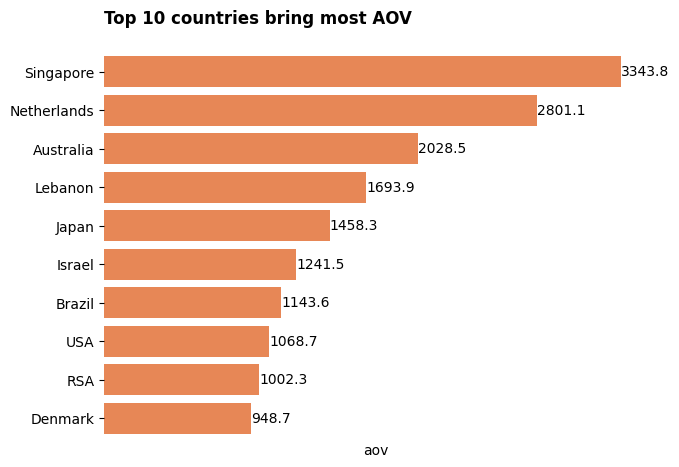

In [32]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data = dfplot,
    y = 'country',
    x = 'aov',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('Top 10 countries bring most AOV\n', loc='left', weight='bold')
plt.show()

### Insight
Singapore stands out with the highest AOV at 3,343.8, significantly surpassing other countries.
The Netherlands (2,801.1) and Australia (2,028.5) also reflect notably higher spending per order compared to the remaining markets.
This suggests certain regions (especially Singapore) yield premium-order revenue, even if volumes may be smaller. Targeting these high-AOV markets could be highly profitable for higher-end or specialized product lines.

### Now we will take 2 countries UK and Singapore to analyze more about the top most purchased products of each country.

In [33]:
dfplot = df.groupby(
    ['country', 'description']
)['quantity'].sum().reset_index()

In [34]:
dfplot = dfplot.sort_values('quantity', ascending=False)
dfplot

,country,description,quantity
17037,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,151247
18819,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49067
16814,United Kingdom,JUMBO BAG RED RETROSPOT,42105
18731,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,36560
15274,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,31501
...,...,...,...
8153,Germany,PORCELAIN HANGING BELL SMALL,1
6919,France,TRAVEL CARD WALLET RETRO PETALS,1
6923,France,TRAVEL CARD WALLET VINTAGE ROSE,1
19019,Unspecified,MOTHER'S KITCHEN SPOON REST,1


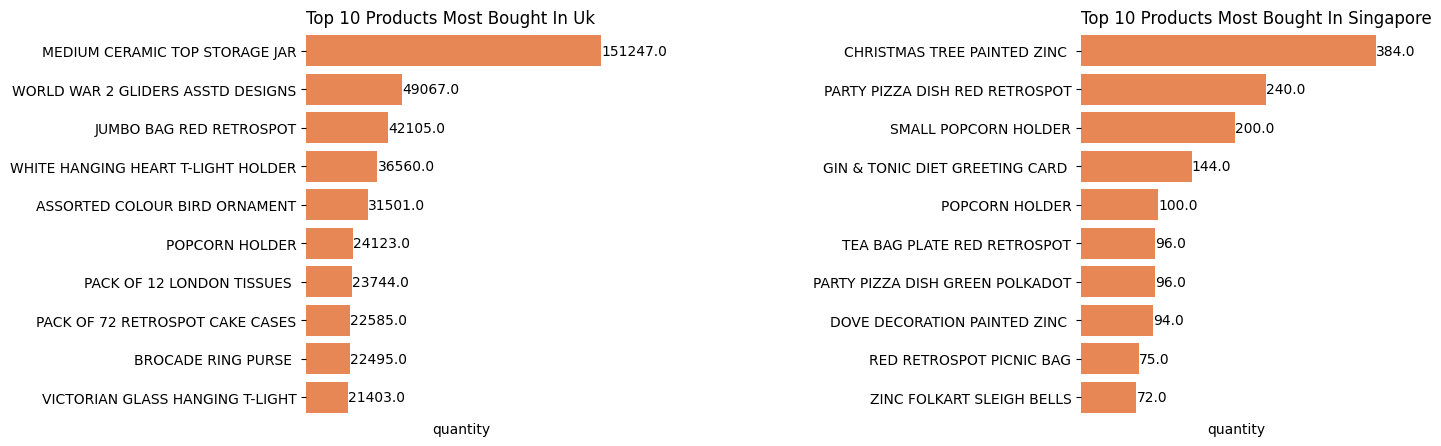

In [35]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
dfplot_uk = dfplot[dfplot['country'] == 'United Kingdom'].head(10)

ax = sns.barplot(
    data = dfplot_uk,
    y = 'description',
    x = 'quantity',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 products most bought in UK'.title(), loc='left')

plt.subplot(122)
dfplot_sing = dfplot[dfplot['country'] == 'Singapore'].head(10)

ax = sns.barplot(
    data = dfplot_sing,
    y = 'description',
    x = 'quantity',
    color = '#FF7F3E'
)
plt.bar_label(ax.containers[0], fmt='%.1f')
ax.set_frame_on(False)
plt.xticks([]), plt.ylabel('')
plt.title('top 10 products most bought in Singapore'.title(), loc='left')
plt.subplots_adjust(wspace=1.5)
plt.show()

### Insights

In the UK, items show massive volumes, led by the Medium Ceramic Top Storage Jar at over 150k units.

Popular categories feature home décor and retro-themed accessories (WW2 Gliders, Jumbo Red Retrospot, Popcorn Holder, T-Light Holder).

In Singapore, top-selling items revolve around holiday/seasonal decorations (Christmas Tree Painted Zinc, Party Pizza Dish, etc.), but quantities are only in the hundreds—far smaller than in the UK.

### Recommended Actions

Focus on Core Market: Keep supplying large volumes of retro/decorative lines for the UK market, given consistently high demand.

Enhance Festive Range: In Singapore, emphasize seasonal and holiday-themed products, matching local demand during peak celebration periods.

Tailor Product Mix: Align offerings with local preferences (retro/craft for the UK, holiday items for Singapore) to maximize sales potential in each region.

#### 6. How many new and old customers do you have each month?

In [36]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,Wed,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12


In [37]:
custFirstTranx =  df.groupby('cust_id')['invoice_date'].min().reset_index()
custFirstTranx = custFirstTranx.rename(columns={'invoice_date': 'firstTranxTime'})
custFirstTranx.head()

,cust_id,firstTranxTime
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [38]:
df = pd.merge(
    left  = df, 
    right = custFirstTranx,
    how = 'left',
    on = 'cust_id'
)

In [39]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month,firstTranxTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,Wed,2010-12,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12,2010-12-01 08:26:00


In [40]:
df['customer_type'] = 'old customer'
df.loc[df['firstTranxTime'] == df['invoice_date'], 'customer_type'] = 'new customer'

df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month,firstTranxTime,customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,Wed,2010-12,2010-12-01 08:26:00,new customer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,Wed,2010-12,2010-12-01 08:26:00,new customer


In [41]:
df[df['cust_id'] == 17850].drop_duplicates('invoice_num').head(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month,firstTranxTime,customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,12,1,8,Wed,2010-12,2010-12-01 08:26:00,new customer
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.1,12,1,8,Wed,2010-12,2010-12-01 08:26:00,old customer
47,536372,22633,HAND WARMER UNION JACK,6,2010-12-01 09:01:00,1.85,17850,United Kingdom,11.1,12,1,9,Wed,2010-12,2010-12-01 08:26:00,old customer


In [42]:
customerTypedf = df.groupby(
    ['year_month', 'customer_type']
).agg(
    customer_count = ('cust_id', 'nunique')
).reset_index()

customerTypedf.head()

,year_month,customer_type,customer_count
0,2010-12,new customer,948
1,2010-12,old customer,356
2,2011-01,new customer,421
3,2011-01,old customer,464
4,2011-02,new customer,380


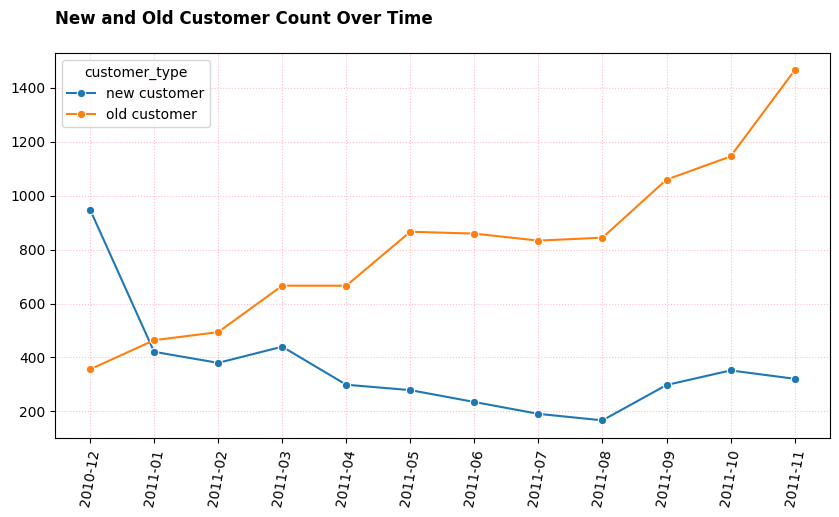

In [43]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data = customerTypedf,
    x = 'year_month',
    y = 'customer_count',
    hue = 'customer_type',
    marker = 'o'
)
plt.xticks(rotation=80)
plt.title('New and Old Customer Count Over Time\n', weight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.grid(True, ls=':', color='pink')
plt.show()

### Insights

Old customers increase steadily over time, rising from around 400 to about 1,400 by November 2011, especially taking off after mid-year.

New customers start high (near 1,000 in December 2010) but drop sharply, dipping below 300 in mid-2011 before a mild rebound in Q4.

This pattern suggests strong retention efforts for existing customers, while new customer acquisition appears to lose momentum through most of the year.

### Recommended Actions

Boost New Customer Acquisition: Reassess marketing campaigns targeting new users, given their significant decline post–Q1.

Maintain Retention Strategies: Current efforts to keep old customers seem effective—continue loyalty benefits or membership programs.

Analyze Q3–Q4 Improvements: Identify what triggered the slight uptick in new customers from August 2011 onward and expand those initiatives to sustain growth.

#### 7. Considering the new customers of December 2010, what is the average transaction value of these customers in each month when they return?

In [49]:
df.head(1)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,week_days,year_month,firstTranxTime,customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,12,1,8,Wed,2010-12,2010-12-01 08:26:00,new customer


In [50]:
ym = '2010-12'
new_customer_in_ym = df[(df['year_month'] == ym) & (df['customer_type'] == 'new customer')]['cust_id'].unique()
new_customer_sum_order_amount = df[df['cust_id'].isin(new_customer_in_ym)].groupby(
    ['year_month', 'cust_id']
)['amount'].sum().reset_index()
dfplot = new_customer_sum_order_amount.groupby(
    'year_month'
).agg(
    mean_customer_amount = ('amount', 'mean')
).reset_index()
dfplot

,year_month,mean_customer_amount
0,2010-12,623.231814
1,2011-01,800.191823
2,2011-02,772.386309
3,2011-03,879.728256
4,2011-04,625.022170
5,2011-05,967.765452
6,2011-06,911.632500
7,2011-07,976.884673
8,2011-08,1075.729673
9,2011-09,1323.478663


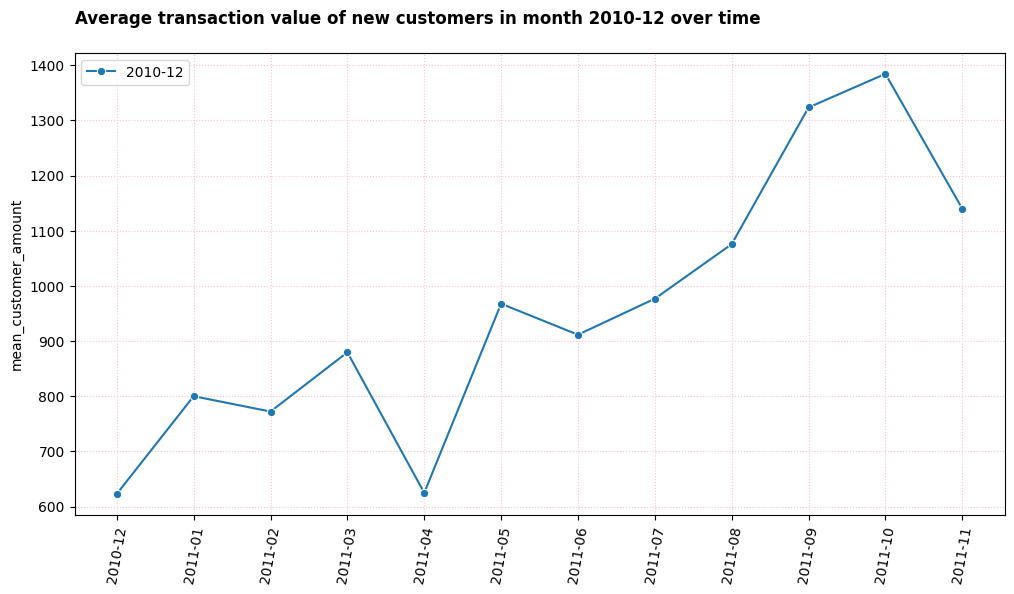

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data = dfplot,
    x = 'year_month',
    y = 'mean_customer_amount',
    marker='o',
    label = ym
)

plt.title(f'Average transaction value of new customers in month {ym} over time\n', weight = 'bold', loc='left')
plt.xticks(rotation=80), plt.xlabel('')
plt.grid(True, ls = ':', color = 'pink')
plt.show()

### Insight

Average transaction value (ATV) for new customers begins around 600 in December 2010, rises unevenly, then dips near 600 again in April 2011 before a steady climb to a peak of ~1,400 by October 2011.

The final drop in November (down to ~1,000) suggests variability in high-value orders from new users near year-end.

### Recommended Actions

Investigate April–May Dip: Check if a lack of promotions or product mix changes caused the ATV drop, and address it to avoid repeats.

Maintain High-Value Trend: In Q3–Q4, pinpoint what boosted ATV (premium offers, targeted upsells) and replicate that strategy year-round.

Focus on Consistency: The post-peak decline in November indicates a need for steady incentives or relevant product bundles to keep new customers spending consistently.

#### 8. Customer Segmentation:

In [52]:
maxTransDate = max(df['invoice_date'])
rf_df = df.groupby(
    'cust_id'
).agg(
    last_trans_date = ('invoice_date', 'max'),
    frequency = ('invoice_num', 'nunique')
).reset_index()
rf_df['recency'] = (maxTransDate - rf_df['last_trans_date']).dt.days
rf_df.head()

,cust_id,last_trans_date,frequency,recency
0,12346,2011-01-18 10:17:00,2,316
1,12347,2011-10-31 12:25:00,6,30
2,12348,2011-09-25 13:13:00,4,66
3,12349,2011-11-21 09:51:00,1,9
4,12350,2011-02-02 16:01:00,1,301


In [53]:
rf_df.describe()

,cust_id,last_trans_date,frequency,recency
count,4331.000000,4331,4331.000000,4331.000000
mean,15301.893789,2011-09-01 06:32:32.930039296,4.910875,90.252828
min,12346.000000,2010-12-01 09:53:00,1.000000,0.000000
25%,13815.500000,2011-07-09 14:21:30,1.000000,15.000000
50%,15301.000000,2011-10-13 14:47:00,3.000000,48.000000
75%,16780.500000,2011-11-15 15:28:00,5.000000,144.000000
max,18287.000000,2011-11-30 17:42:00,238.000000,364.000000
std,1721.496466,NaN,9.025901,99.388939


In [54]:
rf_df.loc[rf_df['recency']<15, 'recency_score'] = 3
rf_df.loc[(rf_df['recency']>=15) & (rf_df['recency']<=48), 'recency_score'] = 2
rf_df.loc[rf_df['recency']>48, 'recency_score'] = 1


rf_df.loc[rf_df['frequency']>5, 'frequency_score'] = 3
rf_df.loc[(rf_df['frequency']>=2) & (rf_df['frequency']<=5), 'frequency_score'] = 2
rf_df.loc[rf_df['frequency']==1, 'frequency_score'] = 1

In [55]:
rf_df

,cust_id,last_trans_date,frequency,recency,recency_score,frequency_score
0,12346,2011-01-18 10:17:00,2,316,1.0,2.0
1,12347,2011-10-31 12:25:00,6,30,2.0,3.0
2,12348,2011-09-25 13:13:00,4,66,1.0,2.0
3,12349,2011-11-21 09:51:00,1,9,3.0,1.0
4,12350,2011-02-02 16:01:00,1,301,1.0,1.0
...,...,...,...,...,...,...
4326,18280,2011-03-07 09:52:00,1,268,1.0,1.0
4327,18281,2011-06-12 10:53:00,1,171,1.0,1.0
4328,18282,2011-08-09 15:10:00,2,113,1.0,2.0
4329,18283,2011-11-30 12:59:00,15,0,3.0,3.0


In [56]:
rf_df.loc[(rf_df['recency_score'] == 3) & (rf_df['frequency_score'] == 3), 'customer_rf_type'] = 'Loyal'
rf_df.loc[(rf_df['recency_score'] == 3) & (rf_df['frequency_score'] == 2), 'customer_rf_type'] = 'Potential loyal'
rf_df.loc[(rf_df['recency_score'] == 2) & (rf_df['frequency_score'] == 3), 'customer_rf_type'] = 'Losing loyal'
rf_df.loc[(rf_df['recency_score'] == 1) & (rf_df['frequency_score'] == 3), 'customer_rf_type'] = 'Lost loyal'
rf_df.loc[(rf_df['recency_score'] <= 2) & (rf_df['frequency_score'] == 2), 'customer_rf_type'] = 'Losing potential loyal'
rf_df.loc[(rf_df['recency_score'] <= 2) & (rf_df['frequency_score'] == 1), 'customer_rf_type'] = 'Low value'
rf_df.loc[(rf_df['recency_score'] == 3) & (rf_df['frequency_score'] == 1), 'customer_rf_type'] = 'New customer'

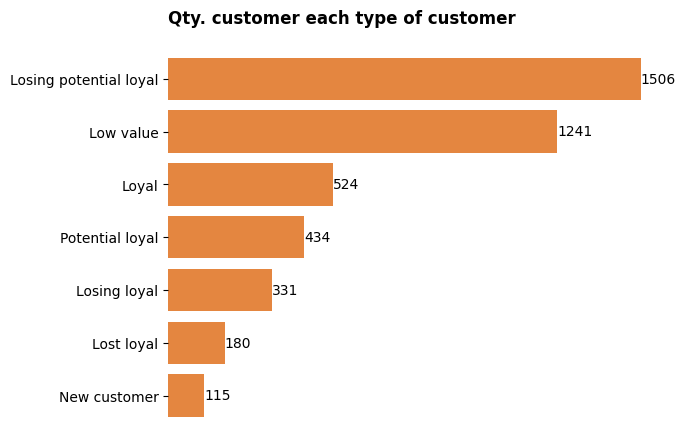

In [57]:
dfplot = rf_df.groupby(
    'customer_rf_type'
)['cust_id'].count().sort_values(ascending=False).reset_index()

ax = sns.barplot(
    data = dfplot,
    y = 'customer_rf_type',
    x = 'cust_id',
    color = '#FF8225'
)
plt.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Qty. customer each type of customer\n', loc='left', weight='bold')
ax.set_frame_on(False)
plt.xticks([]), plt.xlabel(''), plt.ylabel('')
plt.show()

### Insights

Losing potential loyal (1,506) is the largest segment, indicating many customers once close to loyalty are slipping away.

Low value (1,241) is the second-biggest group, with smaller purchase amounts.

Loyal (524) remains relatively small, while Lost loyal (180) shows previously committed customers who have now churned.

New customers (115) is the smallest segment, reflecting limited recent acquisition.

#### Recommended Actions

Re-engage “Losing potential loyal”: Offer targeted promotions or personalized outreach to convert them into fully loyal customers.

Upsell to “Low value”: Introduce relevant bundles or cross-selling to increase average spend.

Retain “Loyal”: Maintain VIP benefits and appreciation programs to reward and incentivize ongoing commitment.

Reactivate “Lost loyal”: Send win-back offers or address past issues to encourage their return.

Expand “New”: Strengthen marketing channels (referrals, ads) to attract more first-time buyers.

In [58]:
df = pd.merge(
    left = df,
    right = rf_df,
    how = 'left',
    on = 'cust_id'
)

,customer_rf_type,amount
4,Loyal,4101433.370
1,Losing potential loyal,1711735.103
0,Losing loyal,1633904.750
6,Potential loyal,479746.280
3,Low value,435235.781
2,Lost loyal,432793.240
5,New customer,34022.270


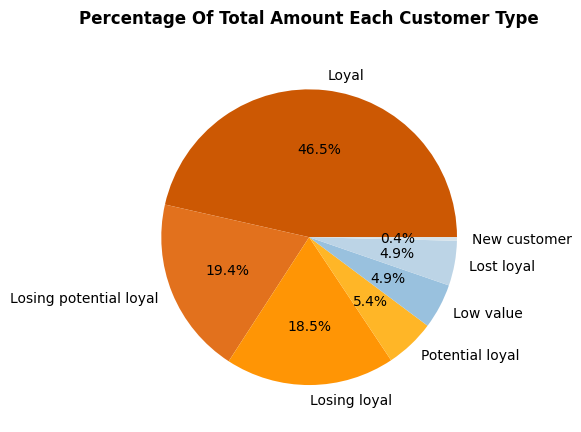

In [59]:
dfplot = df.groupby(
    'customer_rf_type'
)['amount'].sum().reset_index()

dfplot.sort_values('amount', ascending=False, inplace=True)

ax = plt.pie(
    x = dfplot['amount'],
    autopct = '%1.1f%%',
    labels = dfplot['customer_rf_type'],
    colors = ["#cc5803","#e2711d","#ff9505","#ffb627","#99c1de", "#bcd4e6", "#d6e2e9"]
)
plt.title('Percentage of total amount each customer type\n'.title(), weight='bold')
dfplot

### Insights

Loyal customers generate nearly half of total revenue (46.5%), emphasizing their critical role in sales.

Losing potential loyal (19.4%) and losing loyal (18.5%) together account for over one-third of revenue, but risk dropping off if unaddressed.

New customer revenue is minimal (0.4%), indicating limited recent acquisition impact.

### Recommended Actions

Nurture “Loyal”: Sustain VIP perks or reward programs; these clients underpin almost half your revenue.

Rescue “Losing” Segments: Prioritize re-engagement strategies—personalized offers, proactive outreach—to prevent further revenue erosion.

Boost New Customer Efforts: Enhance marketing to grow that 0.4%, ensuring future pipeline expansion.